<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Necessary-Libraries" data-toc-modified-id="Importing-Necessary-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Necessary Libraries</a></span></li><li><span><a href="#Loading-Datasets" data-toc-modified-id="Loading-Datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Datasets</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span></li></ul></div>

# Importing Necessary Libraries

In [16]:
# Importing libraries for analysis
import pandas as pd
import numpy as np
import tensorflow as tf

# Importing libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.ticker as ticker

In [17]:
#Adjusting display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 200)
sns.set_theme()

# Loading Datasets

In [18]:
df=pd.read_csv('Data/Wide Dataset.csv')

df_panel=pd.read_csv('Data/Panel Dataset.csv')

df_nonanon=pd.read_csv('Data/Non Anon.csv')

# Data Visualization

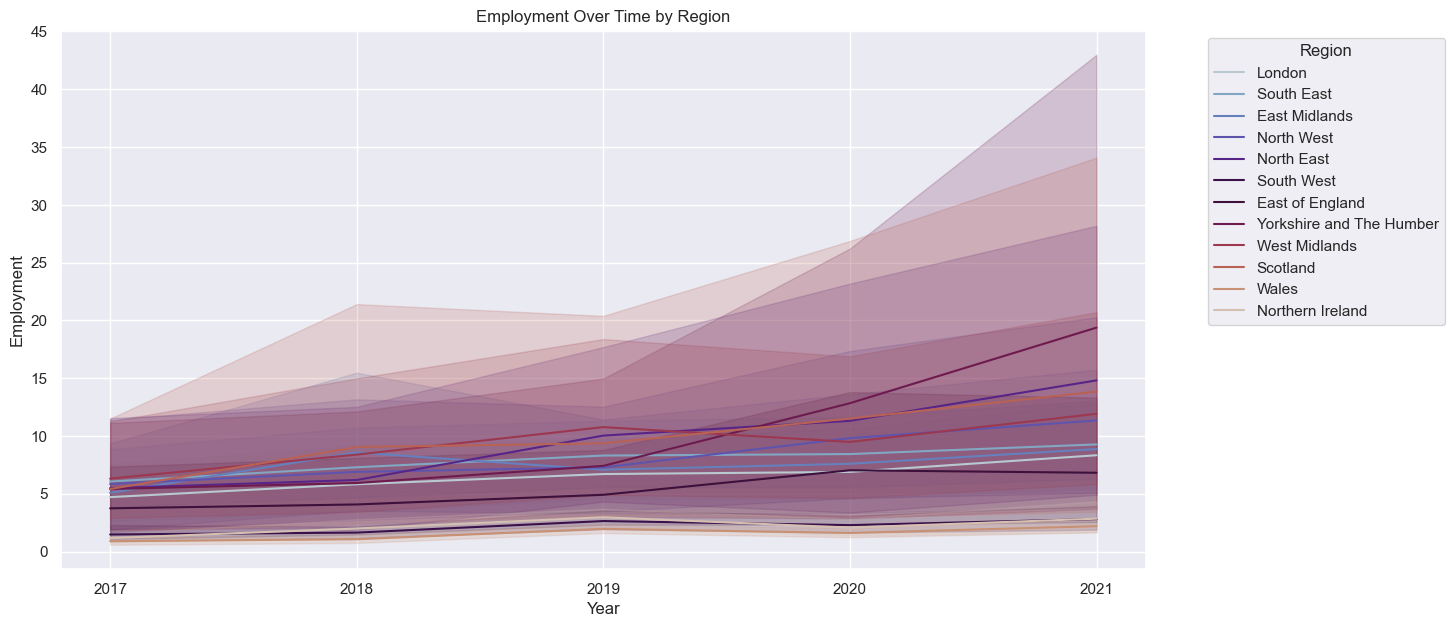

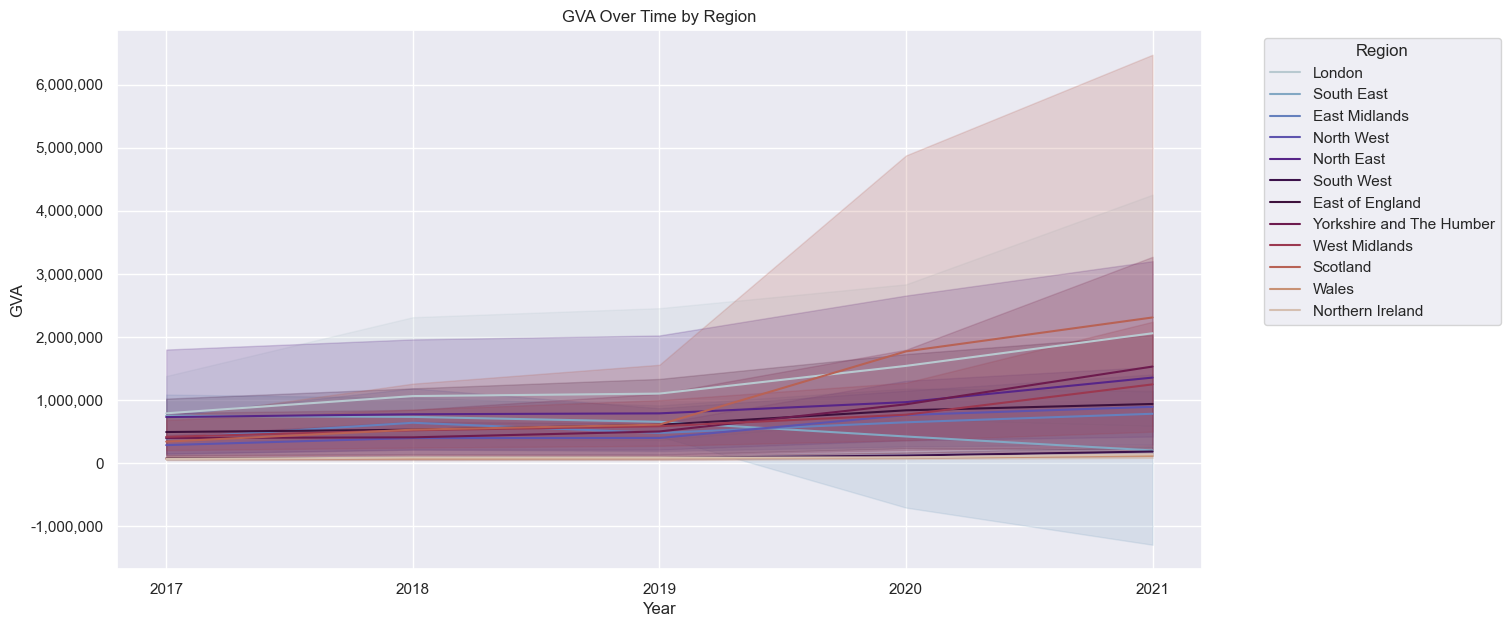

In [19]:
# Creating line plots for GVA and employment
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_panel, x='Year', y='Employment', hue='Region', palette='twilight')
plt.title('Employment Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Employment')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.minorticks_on()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_panel, x='Year', y='GVA', hue='Region', palette='twilight')
plt.title('GVA Over Time by Region')
plt.xlabel('Year')
plt.ylabel('GVA')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.minorticks_on()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) 
plt.show()

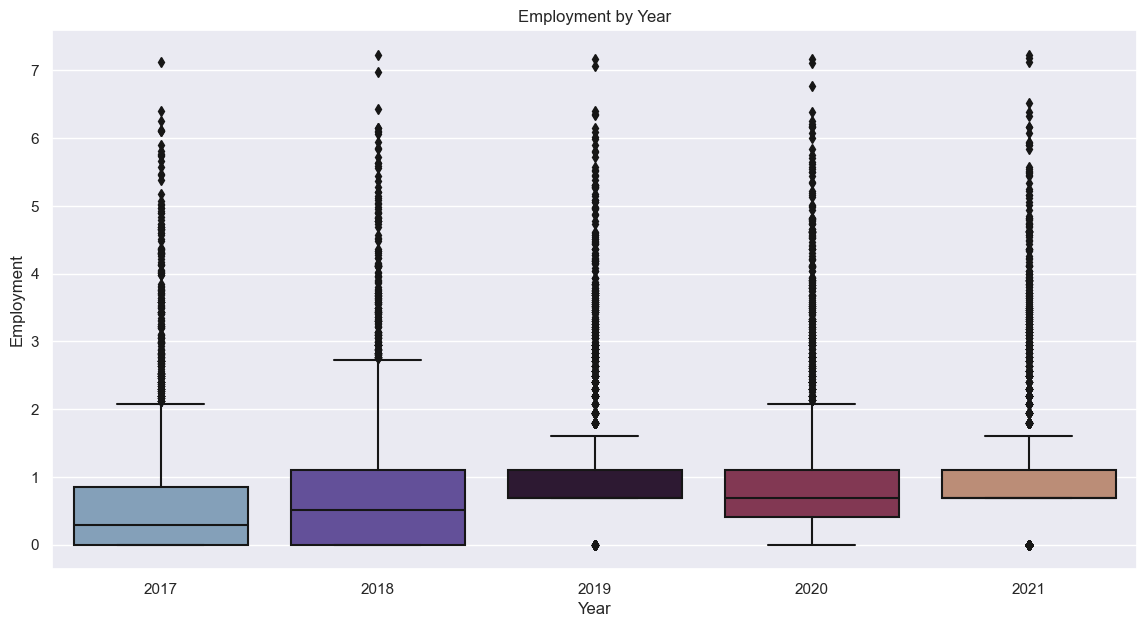

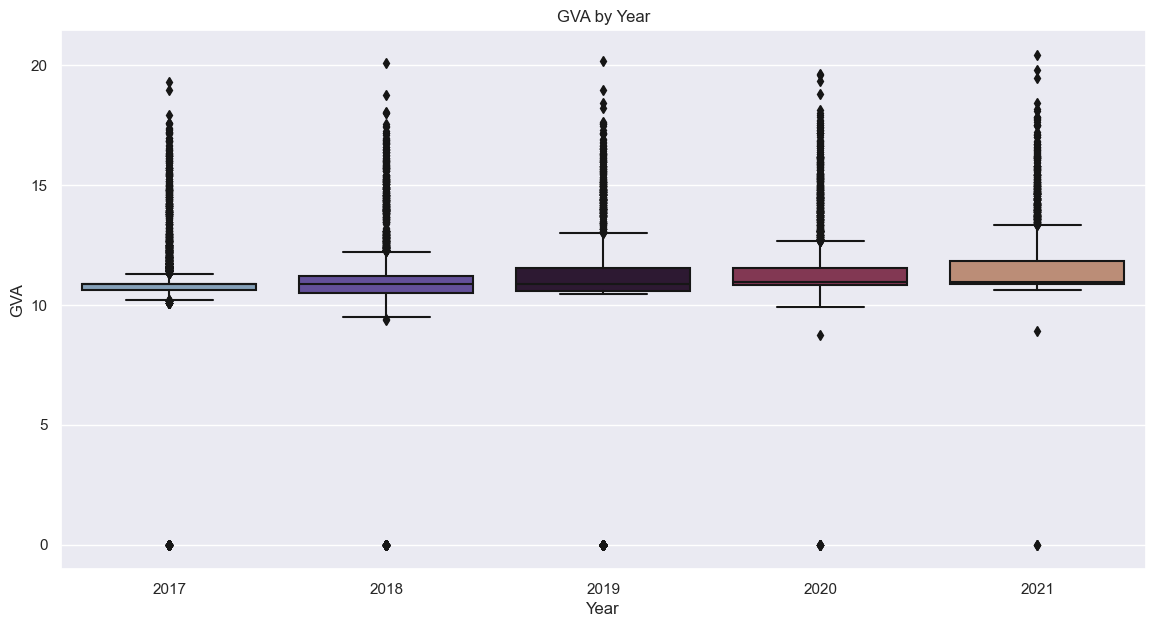

In [20]:
df_viz=df_panel.copy()

#Creating boxplots for GVA and employment with log scales for better visibility

df_viz['Employment'] = df_viz['Employment'].apply(lambda x: max(x, 0)) 
df_viz['GVA'] = df_viz['GVA'].apply(lambda x: max(x, 0))             

df_viz['Employment'].fillna(1e-10, inplace=True)
df_viz['GVA'].fillna(1e-10, inplace=True)

df_viz['Log Employment'] = np.log1p(df_viz['Employment'])
df_viz['Log GVA'] = np.log1p(df_viz['GVA'])

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_viz, x='Year', y='Log Employment', palette='twilight')
plt.title('Employment by Year')
plt.xlabel('Year')
plt.ylabel('Employment')
plt.xticks(rotation=0)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.gca().yaxis.get_major_locator().set_params(integer=True) 
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_viz, x='Year', y='Log GVA', palette='twilight')
plt.title('GVA by Year')
plt.xlabel('Year')
plt.ylabel('GVA')
plt.xticks(rotation=0)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.gca().yaxis.get_major_locator().set_params(integer=True)
plt.show()

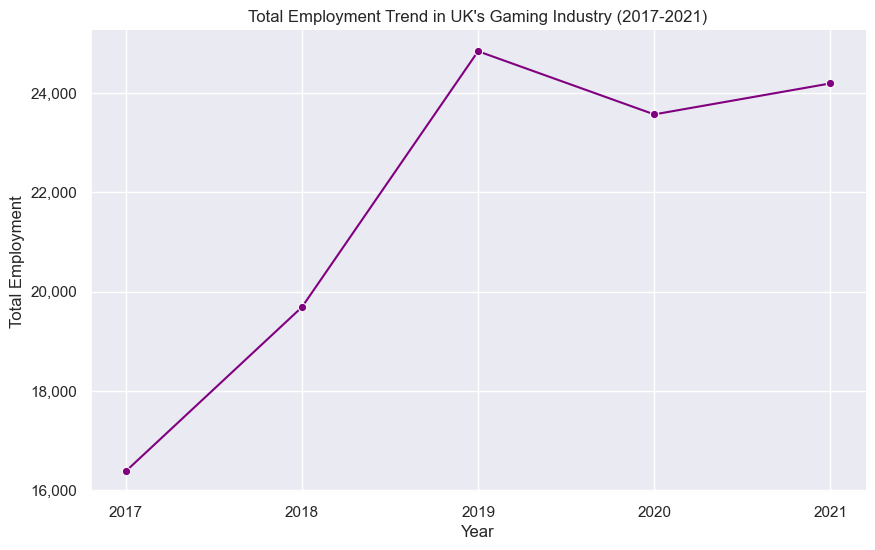

In [21]:
# Creating time trend for employment
employment_cols = ['Total Employment 2017', 'Total Employment 2018', 'Total Employment 2019', 'Total Employment 2020', 'Total Employment 2021']
df['Total Employment'] = df[employment_cols].sum(axis=1)

employment_trend = df[employment_cols].sum().reset_index()
employment_trend.columns = ['Year', 'Total Employment']
employment_trend['Year'] = employment_trend['Year'].str.extract('(\d{4})').astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(data=employment_trend, x='Year', y='Total Employment', marker='o', color='purple')
plt.title("Total Employment Trend in UK's Gaming Industry (2017-2021)")
plt.xlabel('Year')
plt.ylabel('Total Employment')

sns.despine(right=True, top=True)

plt.gca().yaxis.get_major_locator().set_params(integer=True)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

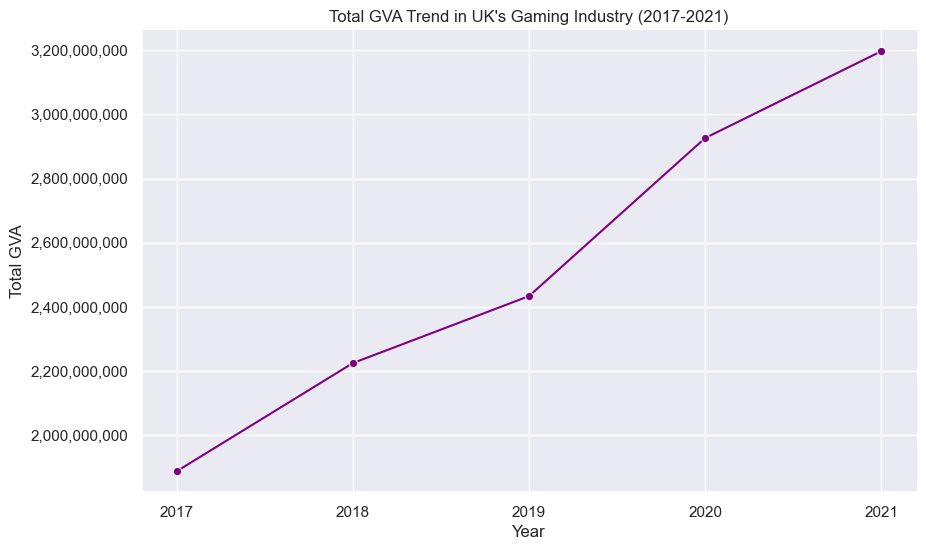

In [22]:
# Creating time trend for GVA
gva_cols = ['Total Company GVA 2017', 'Total Company GVA 2018', 'Total Company GVA 2019', 'Total Company GVA 2020', 'Total Company GVA 2021']
df['Total GVA'] = df[gva_cols].sum(axis=1)

gva_trend = df[gva_cols].sum().reset_index()
gva_trend.columns = ['Year', 'Total GVA']
gva_trend['Year'] = gva_trend['Year'].str.extract('(\d{4})').astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(data=gva_trend, x='Year', y='Total GVA', marker='o', color='purple')
plt.title("Total GVA Trend in UK's Gaming Industry (2017-2021)")
plt.xlabel('Year')
plt.ylabel('Total GVA')

sns.despine(right=True, top=True)

plt.gca().yaxis.get_major_locator().set_params(integer=True)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) if x % 1 == 0 else ""))

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

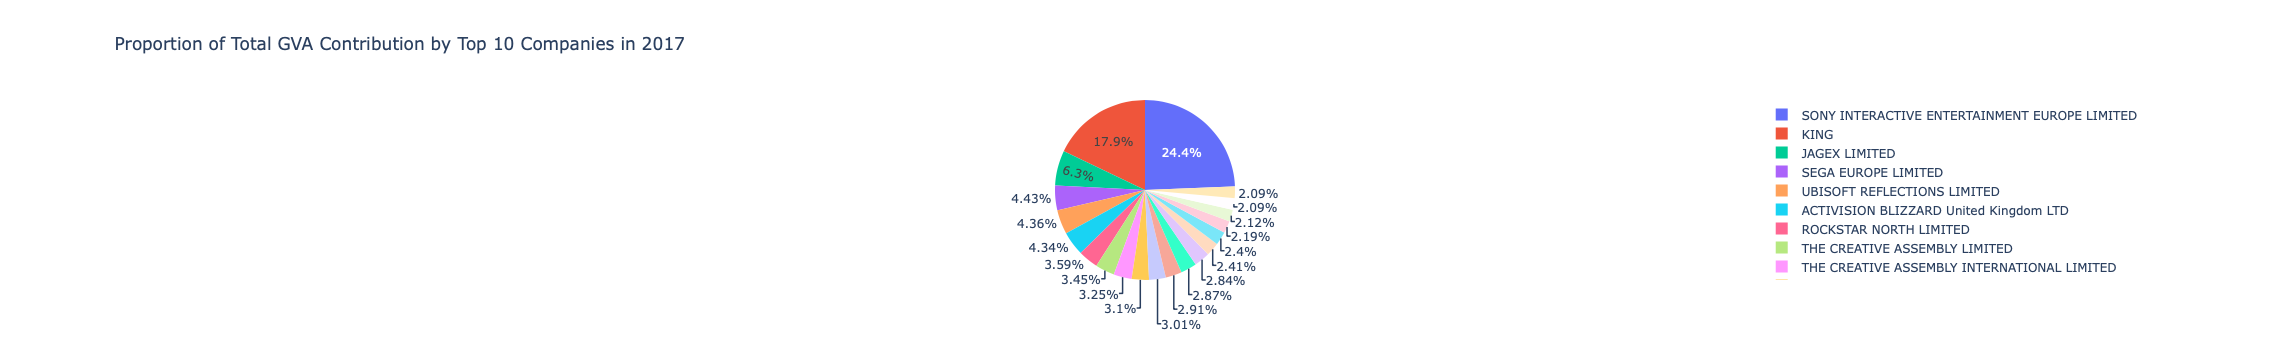

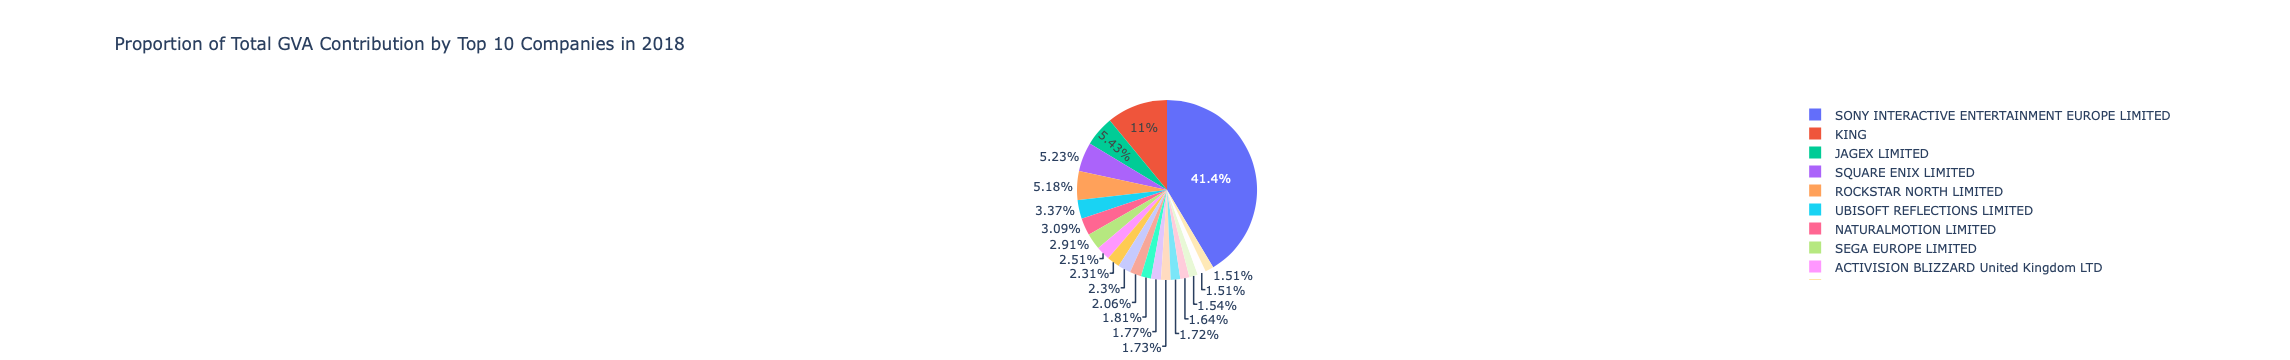

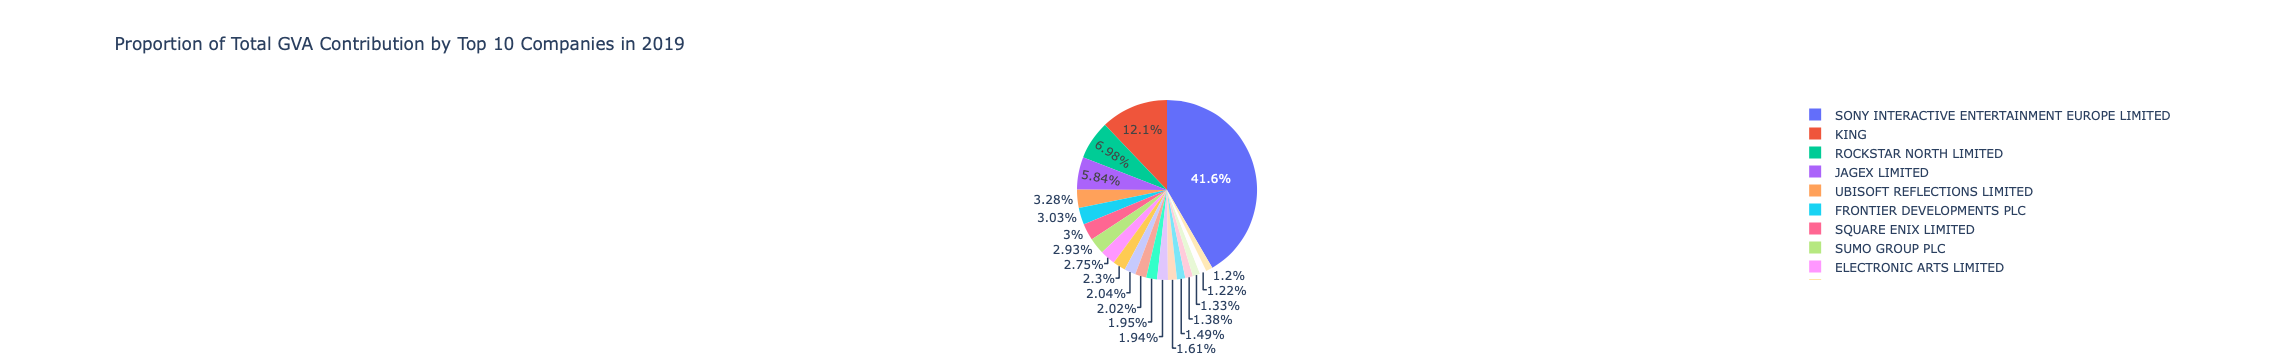

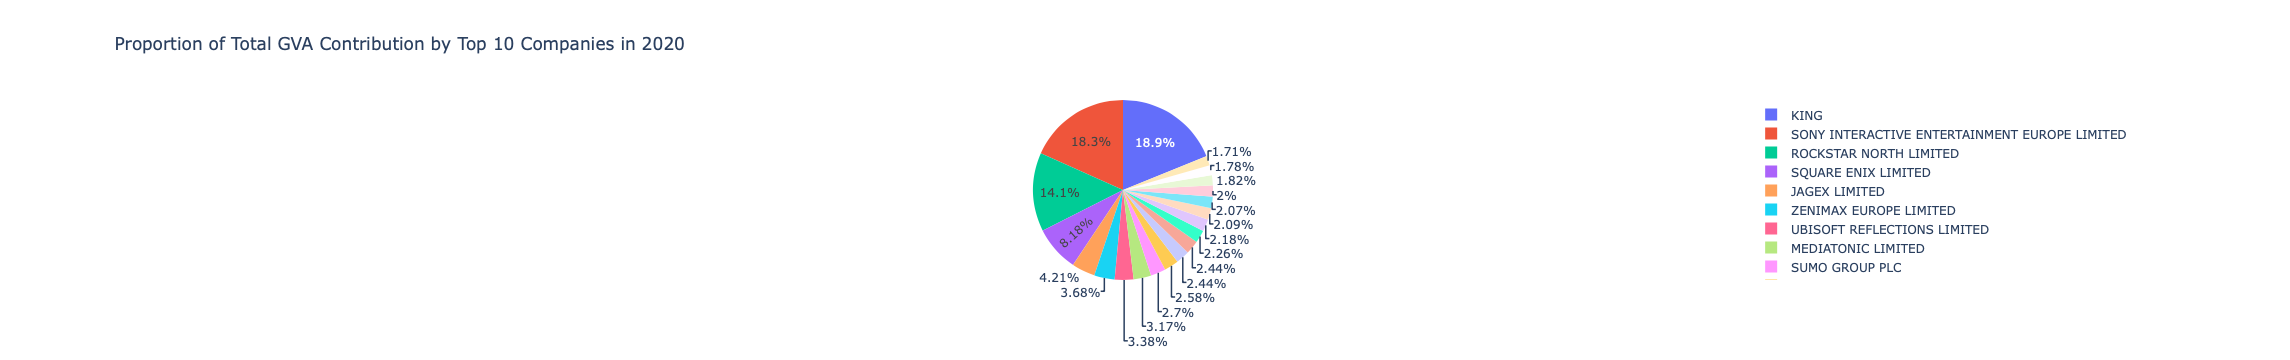

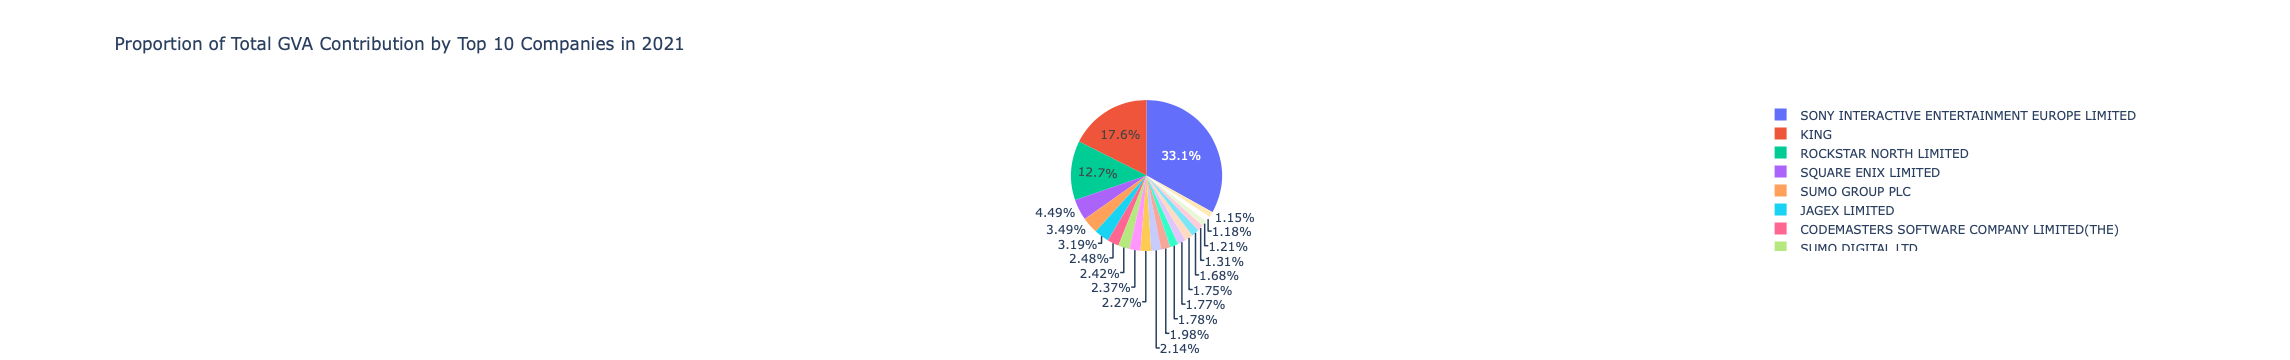

In [23]:
# Pie charts for GVA contribution by top 10 companies
years = [2017, 2018, 2019, 2020, 2021]

for year in years:
    column_name = f'Total Company GVA {year}'
    
    top_10_gva = df_nonanon.nlargest(20, column_name)[['Company Name', column_name]]
    top_10_gva_sum = top_10_gva[column_name].sum()
    top_10_gva['Proportion'] = (top_10_gva[column_name] / top_10_gva_sum) * 100

    fig = px.pie(top_10_gva, values='Proportion', names='Company Name',
                 title=f'Proportion of Total GVA Contribution by Top 10 Companies in {year}',
                 labels={'Proportion': 'Proportion (%)', 'Company Name': 'Company Name'})

    fig.show()

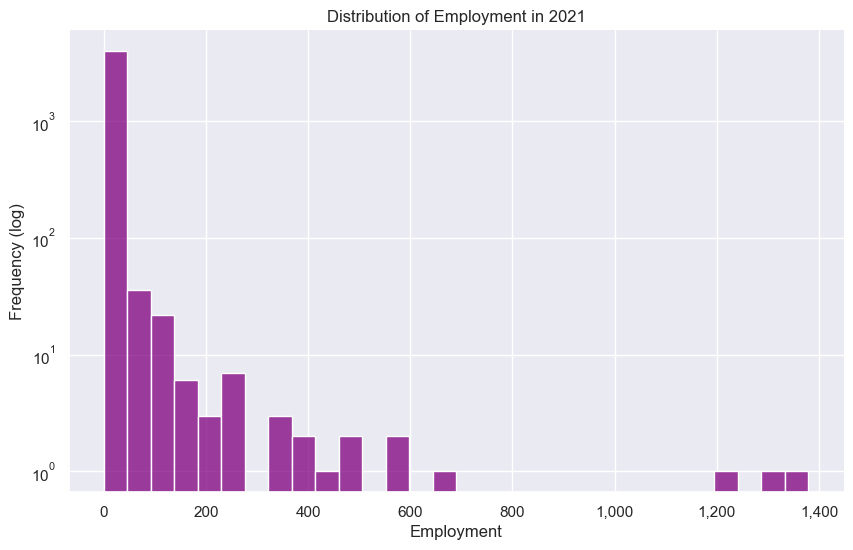

In [24]:
# Plotting the distribution of employment in 2021
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Employment 2021'], bins=30, color='purple')  # Removed KDE
plt.title('Distribution of Employment in 2021')
plt.xlabel('Employment')
plt.ylabel('Frequency (log)')
plt.grid(True)
sns.despine(right=True, top=True)

# Using log scale for frequency for better visibility
plt.yscale('log')

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

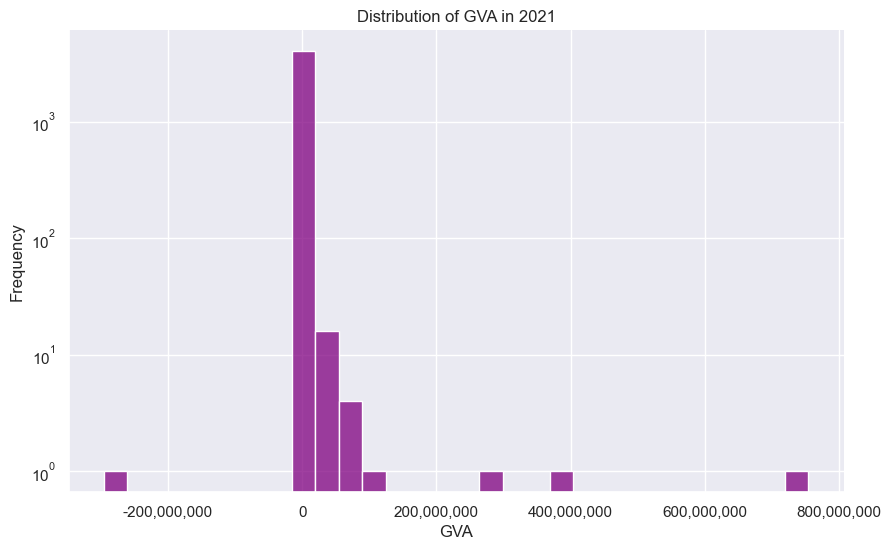

In [25]:
# Plotting the distribution of GVA in 2021
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Company GVA 2021'], bins=30, color='purple')
plt.title('Distribution of GVA in 2021')
plt.xlabel('GVA')
plt.ylabel('Frequency')
plt.grid(True)
sns.despine(right=True, top=True)

plt.yscale('log')

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

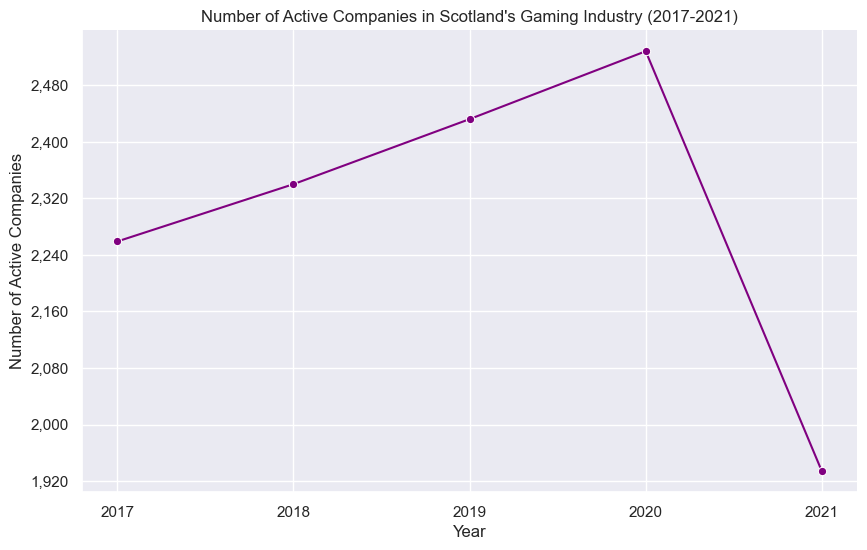

In [26]:
# Time trend for active companies
years = range(2017, 2022)

for year in years:
    df[f'Active in {year}'] = df.apply(
        lambda row: 1 if (pd.to_datetime(row['Incorporation Date'], errors='coerce').year <= year and 
                         (pd.isna(row['Dissolution Date']) or pd.to_datetime(row['Dissolution Date'], errors='coerce').year > year))
        else 0, axis=1)

active_companies_per_year = df[[f'Active in {year}' for year in years]].sum().reset_index()
active_companies_per_year.columns = ['Year', 'Number of Active Companies']
active_companies_per_year['Year'] = active_companies_per_year['Year'].str.extract('(\d{4})').astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(data=active_companies_per_year, x='Year', y='Number of Active Companies', marker='o', color='purple')
plt.title('Number of Active Companies in Scotland\'s Gaming Industry (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Active Companies')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) 
sns.despine()
plt.show()

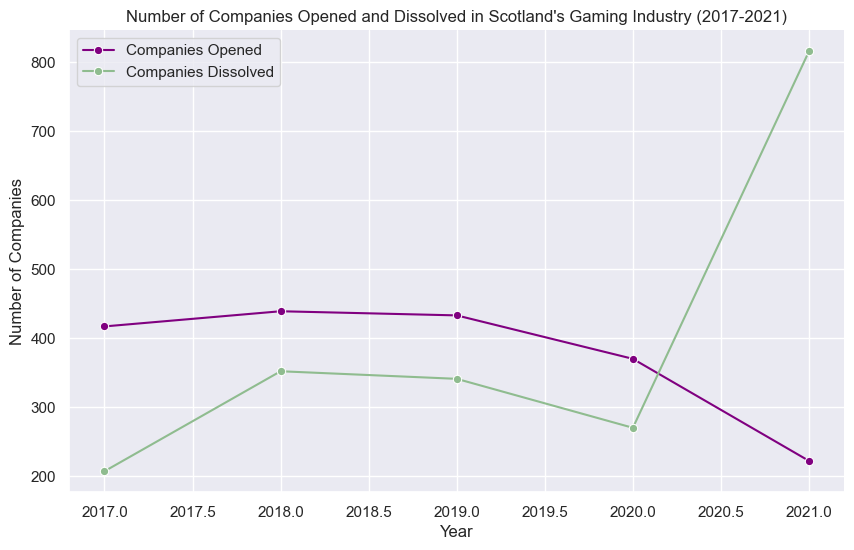

In [27]:
# Plotting the time trend for companies opened and dissolved
df['Dissolution Year'] = pd.to_datetime(df['Dissolution Date'], errors='coerce').dt.year
df['Incorporation Year'] = pd.to_datetime(df['Incorporation Date'], errors='coerce').dt.year

companies_opened_per_year = df['Incorporation Year'].value_counts().sort_index().reset_index()
companies_opened_per_year.columns = ['Year', 'Number of Companies Opened']

companies_closed_per_year = df['Dissolution Year'].value_counts().sort_index().reset_index()
companies_closed_per_year.columns = ['Year', 'Number of Companies Dissolved']

combined_data = pd.merge(companies_opened_per_year, companies_closed_per_year, on='Year', how='outer').fillna(0)
combined_data = combined_data[combined_data['Year'].between(2017, 2021)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_data, x='Year', y='Number of Companies Opened', marker='o', color='purple', label='Companies Opened')
sns.lineplot(data=combined_data, x='Year', y='Number of Companies Dissolved', marker='o', color='darkseagreen', label='Companies Dissolved')
plt.title('Number of Companies Opened and Dissolved in Scotland\'s Gaming Industry (2017-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Companies')

plt.gca().yaxis.get_major_locator().set_params(integer=True)
sns.despine()
plt.legend()
plt.show()

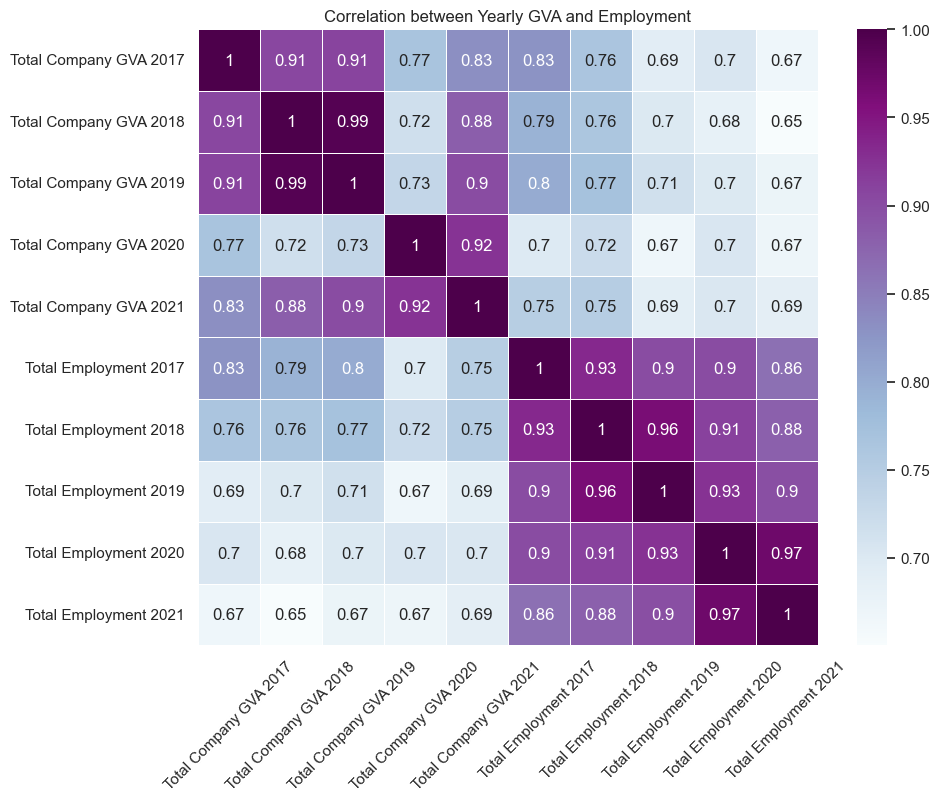

In [28]:
# Correlation matrix for Company GVA and employment for each year
correlation = df[['Total Company GVA 2017', 'Total Company GVA 2018', 'Total Company GVA 2019', 
                                                'Total Company GVA 2020', 'Total Company GVA 2021', 'Total Employment 2017', 'Total Employment 2018', 'Total Employment 2019', 
                                                'Total Employment 2020', 'Total Employment 2021']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='BuPu', linewidths=.5)
plt.title('Correlation between Yearly GVA and Employment')
plt.xticks(rotation=45)
plt.show()

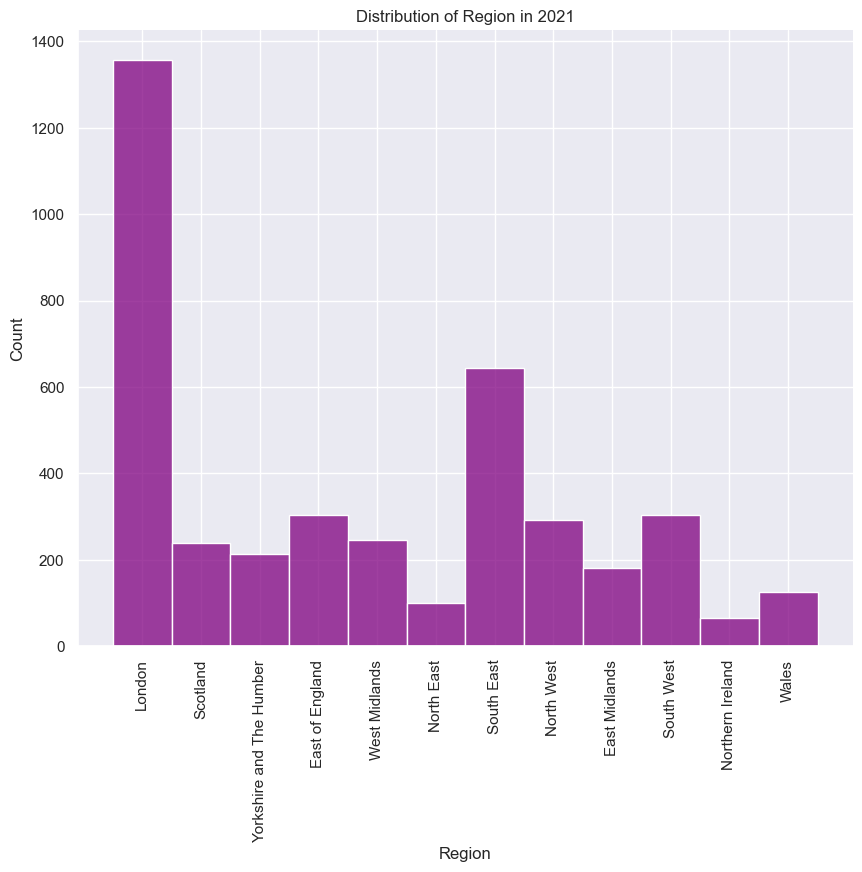

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(df['Region'], bins=30, color='purple')
plt.title('Distribution of Region in 2021')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.grid(True)
sns.despine()
plt.show()

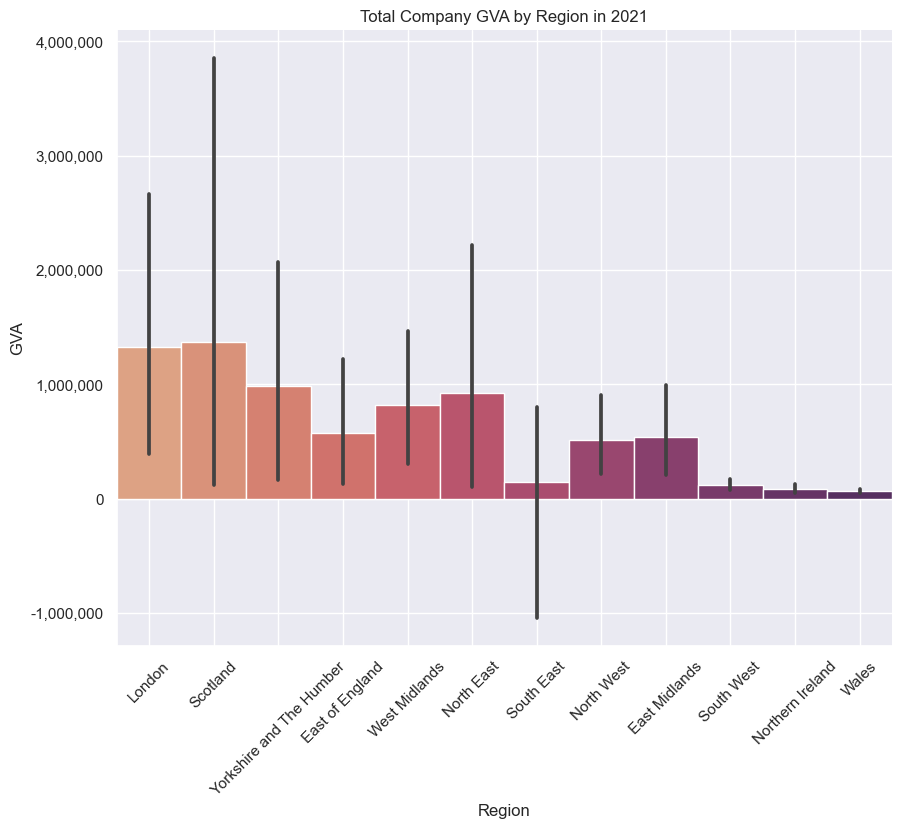

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Region', y='Total Company GVA 2021', width=1, palette='flare')
plt.title('Total Company GVA by Region in 2021')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('GVA')
plt.grid(True)
sns.despine()
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))
plt.show()